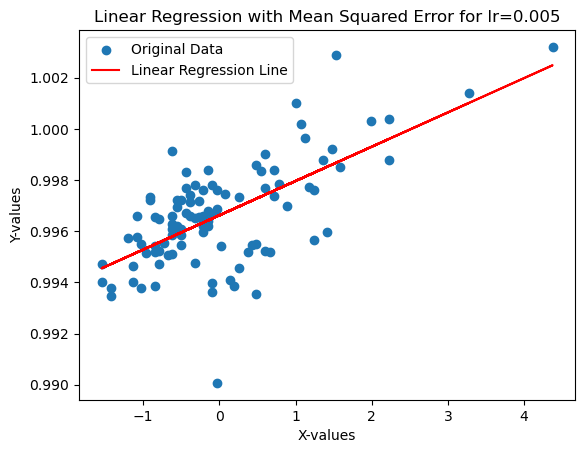

θ0: 0.9966200999999889, θ1: 0.0013401960185109674
MSE: 1.1947898109836565e-06


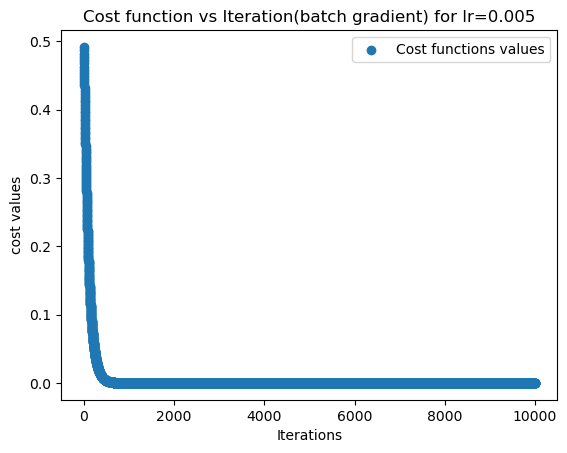

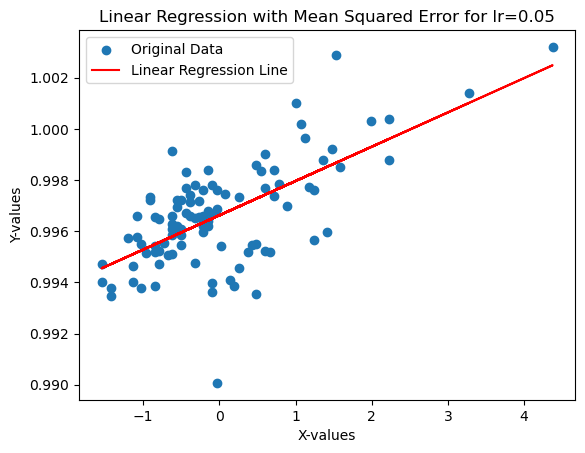

θ0: 0.9966200999999989, θ1: 0.0013401960185109806
MSE: 1.194789810983658e-06


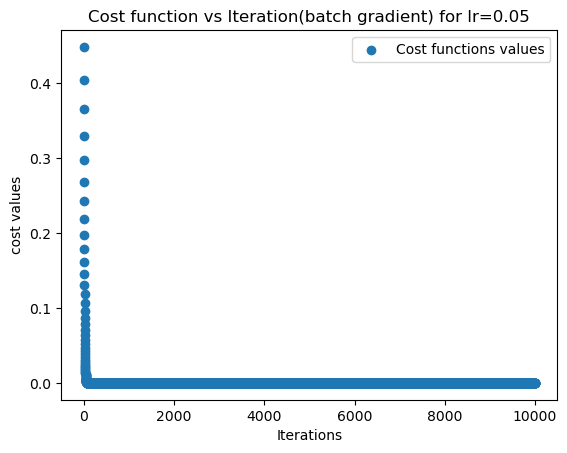

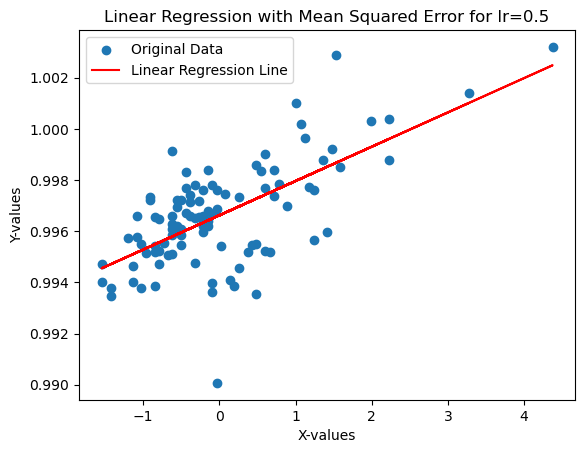

θ0: 0.9966200999999999, θ1: 0.0013401960185109828
MSE: 1.1947898109836603e-06


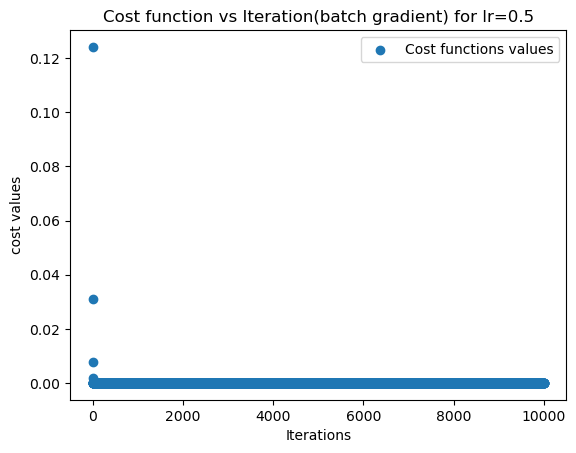

At convergence:
Cost function value = 1.1947898109836654e-06
Value of θ0 = 0.9966200998839781
Value of θ1 = 0.0013401960183549637


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x = np.genfromtxt('C:/Users/sahil/ML/linearX.csv')
y = np.genfromtxt('C:/Users/sahil/ML/linearY.csv')

θ0=0
θ1=0
# lr=0.5
epochs=10000
m=len(x)

x=(x-np.mean(x))/np.std(x)

def cost_function(x, y, θ0, θ1):
    return np.sum(np.square(θ0+θ1*x-y))/(2*m)

def plot(x,y,θ0,θ1, cost, ep, lr):
    pred_Y=θ0+θ1*x
    ep = np.arange(epochs)
    plt.scatter(x,y, label='Original Data')
    plt.plot(x, pred_Y, color='red', label='Linear Regression Line')

    plt.title(f'Linear Regression with Mean Squared Error for lr={lr}')
    plt.xlabel('X-values')
    plt.ylabel('Y-values')
    plt.legend()
    plt.show()

    print(f"θ0: {θ0}, θ1: {θ1}")
    mse = cost_function(x,y,θ0,θ1)
    print(f"MSE: {mse}")

    plt.scatter(ep,cost,label='Cost functions values')
    plt.title(f'Cost function vs Iteration(batch gradient) for lr={lr}')
    plt.xlabel('Iterations')
    plt.ylabel('cost values')
    plt.legend()
    plt.show()

def train(x, y, θ0, θ1, lr):
    th0=np.array([])
    th1=np.array([])
    cost=np.array([])
    ep=np.array([])
    for epoch in range(epochs):
        pred=θ0+θ1*x
        err=pred-y

        θ0_gradient=(1/m) * np.sum(err)    
        θ1_gradient=(1/m) * np.sum(err * x)

        θ0 = θ0 - lr * θ0_gradient
        θ1 = θ1 - lr * θ1_gradient
        th0=np.append(th0, θ0)
        th1=np.append(th1, θ1)
        cost=np.append(cost,cost_function(x, y, θ0, θ1))
        
    plot(x,y,θ0,θ1, cost, ep, lr)
        
    if lr==0.5:
        t=np.array([])
        for i in range(len(cost)-1):
            if(cost[i] != cost[i+1]):
                t = np.append(t,abs(cost[i]-cost[i+1]))
            
        temp = min(t)
        idx = np.where(t==temp)
        idx = idx[0][0]
        print("At convergence:\nCost function value =", cost[idx])
        print("Value of θ0 =", th0[idx])
        print("Value of θ1 =", th1[idx])
            
    
lst=[0.005,0.05,0.5]
for i in lst:
    train(x,y, θ0, θ1, i)

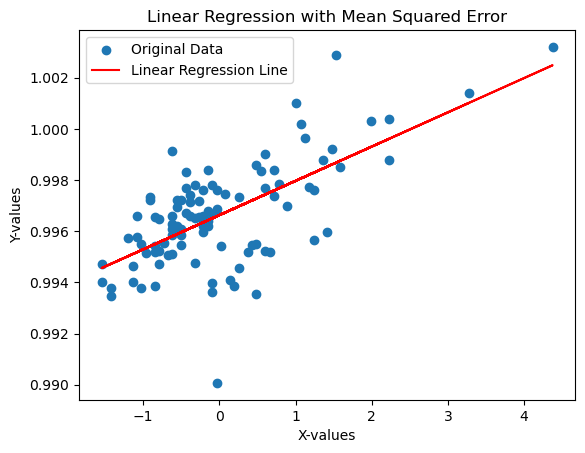

Theta0: 0.996627361778419, Theta1: 0.0013387049476818378
Final MSE: 1.194817289342676e-06


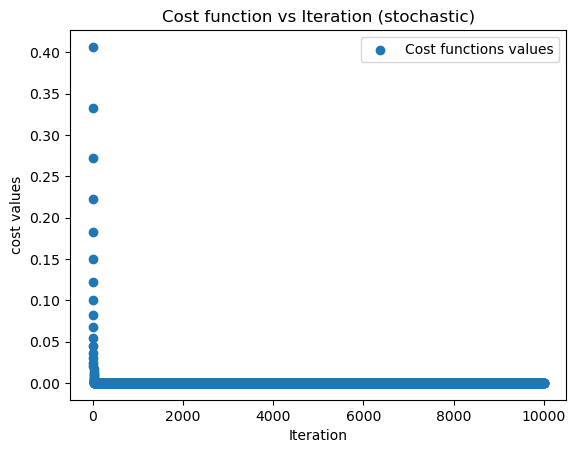

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.genfromtxt('C:/Users/sahil/ML/linearX.csv')
Y = np.genfromtxt('C:/Users/sahil/ML/linearY.csv')


th0=0
th1=0
alpha=0.001
epochs=10000
m=len(X)

# cost=np.array([])
ep=np.array([])
X=(X-np.mean(X))/np.std(X)
def cost_function(th0,th1,Y,X):
    return np.sum(np.square(th0+th1*X-Y))/(2*m)

def stochastic_gradient_descent(th0, th1, X, Y, alpha, epochs):
    cost_vals = []

    for epoch in range(epochs):
        for i in range(len(X)):
            pred = th0 + th1 * X[i]
            error = pred - Y[i]

            th0 -= alpha * error
            th1 -= alpha * error * X[i]

        cost_vals.append(cost_function(th0, th1, Y, X))

    return th0, th1, cost_vals


th0, th1, cost = stochastic_gradient_descent(th0, th1, X, Y, alpha, epochs)
pred_Y=th0+th1*X
# print(th0+th1*3)
ep = np.arange(epochs)
plt.scatter(X,Y, label='Original Data')
plt.plot(X, pred_Y, color='red', label='Linear Regression Line')
# plt.ylim(0.98, 1.003)
plt.title('Linear Regression with Mean Squared Error')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.legend()
plt.show()

print(f"Theta0: {th0}, Theta1: {th1}")
final_mse = cost_function(th0,th1,Y,X)
print(f"Final MSE: {final_mse}")
# Plotting the cost function versus iteration for SGD
plt.scatter(ep,cost,label='Cost functions values')
plt.title('Cost function vs Iteration (stochastic)')
plt.xlabel('Iteration')
plt.ylabel('cost values')
plt.legend()
plt.show()

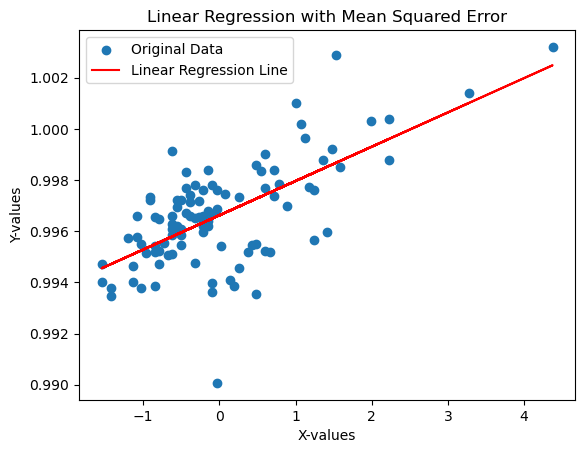

θ0: 0.9966204477084589, θ1: 0.0013400237554501283
MSE: 1.1947898862715235e-06


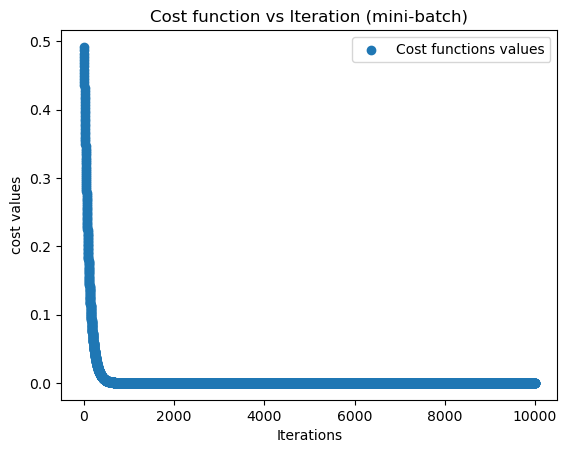

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.genfromtxt('C:/Users/sahil/ML/linearX.csv')
y = np.genfromtxt('C:/Users/sahil/ML/linearY.csv')


θ0=0
θ1=0
lr=0.001
epochs=10000
batch_size=20
m=len(x)

ep=np.array([])
x=(x-np.mean(x))/np.std(x)

def cost_function(x,y,θ0,θ1):
    return np.sum(np.square(θ0+θ1*x-y))/(2*m)

def mini_batch_gradient_descent(x, y, θ0, θ1, lr, epochs, batch_size):
    cost_vals = []

    for epoch in range(epochs):
        for i in range(0, m, batch_size):
            X_batch = x[i:i+batch_size]
            Y_batch = y[i:i+batch_size]

            pred = θ0 + θ1 * X_batch
            err = pred - Y_batch

            θ0 -= lr * np.sum(err) / batch_size
            θ1 -= lr * np.sum(err * X_batch) / batch_size

        cost_vals.append(cost_function(x, y, θ0, θ1))

    return θ0, θ1, cost_vals


θ0, θ1, cost = mini_batch_gradient_descent(x, y, θ0, θ1, lr, epochs, batch_size)
pred_Y=θ0+θ1*x

ep = np.arange(epochs)
plt.scatter(x,y, label='Original Data')
plt.plot(x, pred_Y, color='red', label='Linear Regression Line')

plt.title('Linear Regression with Mean Squared Error')
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.legend()
plt.show()

print(f"θ0: {θ0}, θ1: {θ1}")
mse = cost_function(x, y, θ0, θ1)
print(f"MSE: {mse}")

# Plotting the cost function versus iteration
plt.scatter(ep,cost,label='Cost functions values')
plt.title('Cost function vs Iteration (mini-batch)')
plt.xlabel('Iterations')
plt.ylabel('cost values')
plt.legend()
plt.show()